# The Coca Cola Company Stocks

Lets analyze the price of the stocks from *The Coca-Cola Company*. This company has been around for more than 60 years so we better create a regression model using just the last few years as data in order to be more accurate. We will start with January 2nd, 2012 and end with September 23rd, 2019. 

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
start = datetime.datetime(2012, 1, 2)
end = datetime.datetime(2019, 9, 23)

df = web.DataReader("KO", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,35.355000,35.049999,35.075001,35.070000,15639600.0,27.167812
2012-01-04,35.035000,34.750000,34.955002,34.849998,14239200.0,26.997377
2012-01-05,34.935001,34.674999,34.880001,34.685001,14287600.0,26.869562
2012-01-06,34.814999,34.310001,34.735001,34.465000,13646600.0,26.699139
2012-01-09,34.584999,34.400002,34.500000,34.465000,10522600.0,26.699139


In [3]:
df = df[['Adj Close']]

We will create a model over the data points graphed below and try to minimize the error.

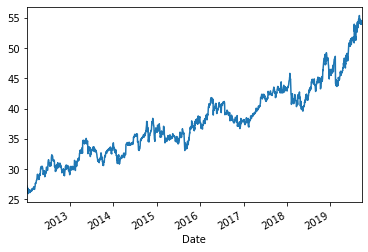

In [4]:
df['Adj Close'].plot()

In [5]:
df.loc[:, 'days'] = df.index

In [6]:
first_day = datetime.datetime(2012, 1, 2)
df['days'] = (df['days'] - first_day).dt.days

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split 

In [8]:
y = df['Adj Close'].values
X = df['days'].values.reshape(-1, 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We will now standardize the feature

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Linear Regression

In [11]:
reg_lin = linear_model.LinearRegression()  
reg_lin.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#To retrieve the intercept:
print(reg_lin.intercept_)

#For retrieving the slope:
print(reg_lin.coef_)

37.848139990411006
[5.72087208]


In [13]:
y_pred_lin = reg_lin.predict(X_test)

In [14]:
df_lin = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lin.flatten()})
df_lin

,Actual,Predicted
0,26.129749,28.615838
1,44.422497,45.686849
2,32.870327,33.144310
3,38.170681,41.214370
4,38.659210,38.617672
5,34.828804,36.559912
6,42.484024,42.642204
7,31.430189,33.739241
8,33.460491,32.353402
9,30.896322,30.050671


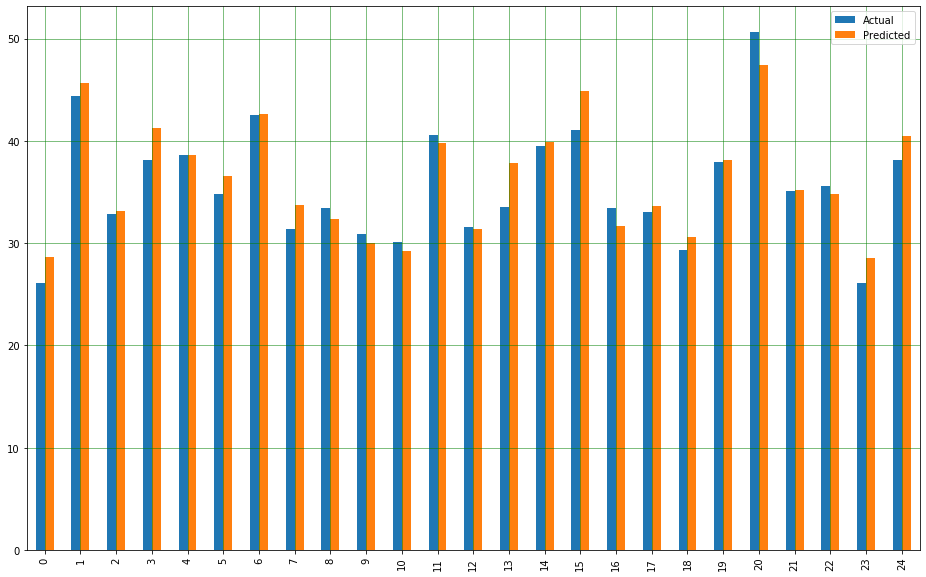

In [15]:
df1_lin = df_lin.head(25)
df1_lin.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

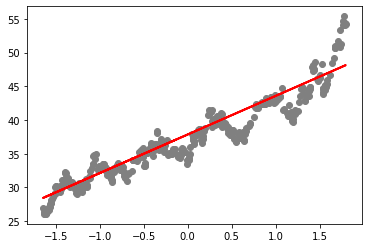

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_lin, color='red', linewidth=2)
plt.show()

In [17]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lin))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lin)))

Mean Absolute Error: 1.5086619611996759
Mean Squared Error: 4.0640859881221525
Root Mean Squared Error: 2.0159578339147255


## Ridge Regression

In [18]:
reg_ridge = linear_model.Ridge(alpha=1.0)
reg_ridge.fit(X_train, y_train) 
print(reg_ridge.coef_)
print(reg_ridge.intercept_)

[5.71719543]
37.848139990411006


In [19]:
y_pred_ridge = reg_ridge.predict(X_test)

In [20]:
df_ridge = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ridge.flatten()})
df_ridge

,Actual,Predicted
0,26.129749,28.621771
1,44.422497,45.681811
2,32.870327,33.147333
3,38.170681,41.212207
4,38.659210,38.617178
5,34.828804,36.560740
6,42.484024,42.639123
7,31.430189,33.741882
8,33.460491,32.356934
9,30.896322,30.055682


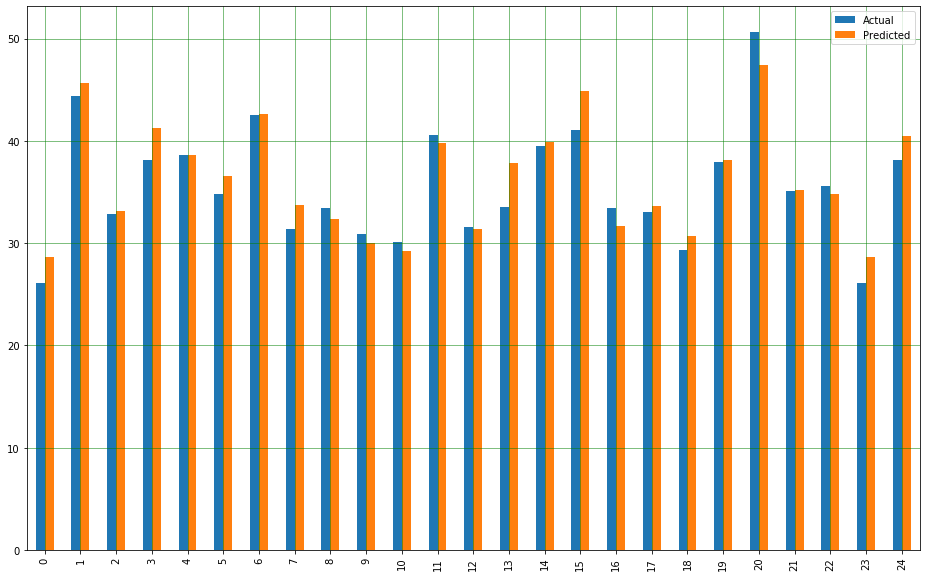

In [21]:
df1_ridge = df_ridge.head(25)
df1_ridge.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

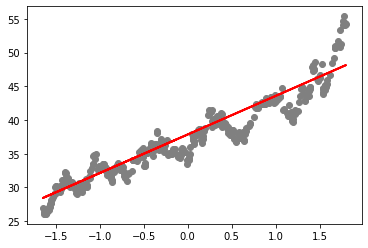

Mean Absolute Error: 1.5084835976479003
Mean Squared Error: 4.064220551705598
Root Mean Squared Error: 2.0159912082411466


In [22]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

## Lasso

In [23]:
reg_lasso = linear_model.Lasso(alpha=1.0)
reg_lasso.fit(X_train, y_train)
print(reg_lasso.coef_)
print(reg_lasso.intercept_)

[4.72087208]
37.848139990411006


In [24]:
y_pred_lasso = reg_lasso.predict(X_test)

In [25]:
df_lasso = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lasso.flatten()})
df_lasso

,Actual,Predicted
0,26.129749,30.229631
1,44.422497,44.316654
2,32.870327,33.966533
3,38.170681,40.625958
4,38.659210,38.483159
5,34.828804,36.785093
6,42.484024,41.804208
7,31.430189,34.457470
8,33.460491,33.313874
9,30.896322,31.413657


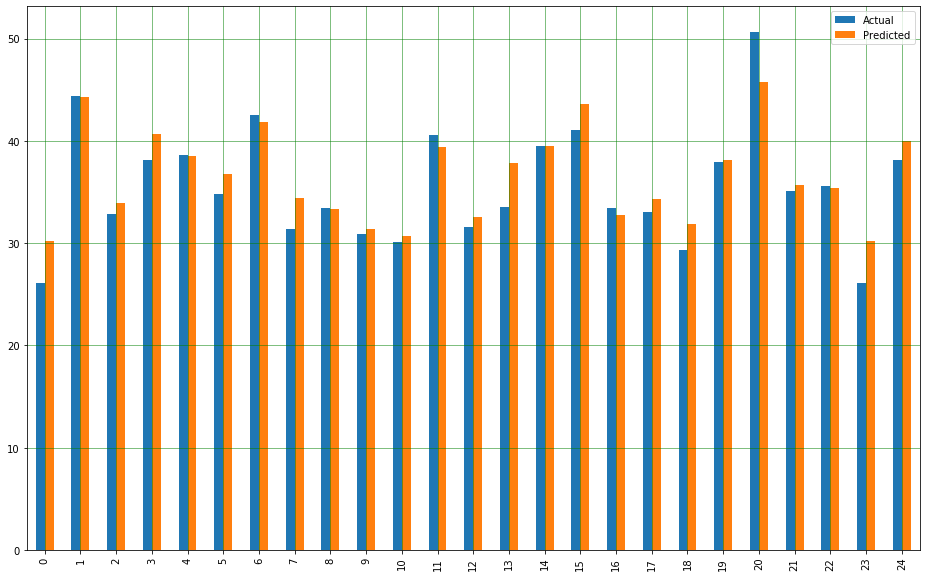

In [26]:
df1_lasso = df_lasso.head(25)
df1_lasso.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

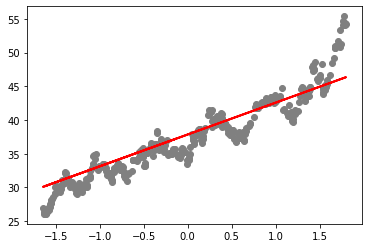

Mean Absolute Error: 1.685654809120343
Mean Squared Error: 5.097008813823152
Root Mean Squared Error: 2.257655601242836


In [27]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_lasso, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

## Conclusion

Both linear regression and ridge regression give the same results. Here there are:

In [28]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lin))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lin)))

df_lin

Mean Absolute Error: 1.5086619611996759
Mean Squared Error: 4.0640859881221525
Root Mean Squared Error: 2.0159578339147255


,Actual,Predicted
0,26.129749,28.615838
1,44.422497,45.686849
2,32.870327,33.144310
3,38.170681,41.214370
4,38.659210,38.617672
5,34.828804,36.559912
6,42.484024,42.642204
7,31.430189,33.739241
8,33.460491,32.353402
9,30.896322,30.050671
